In [64]:
import sys
from pathlib import Path

# Get the folder where this notebook is running
notebook_path = Path().resolve()

# Assume 'src' is at the project root, one level up from the notebook folder
project_root = notebook_path.parent

# Construct the full path to src
src_path = project_root / "src"

# Add src to sys.path if not already there
if str(src_path) not in sys.path:
    sys.path.insert(1, str(src_path))

print(f"Added {src_path} to sys.path")

Added /home/rodolfo/Documents/Rodolfo/Python_Projects/projetos_sem_espacos/churn-powerco/powerco-churn/src to sys.path


In [95]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import set_config
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    average_precision_score
)

from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression


# Configuration

In [66]:
plt.style.use('ggplot')

random_seed = 42

#set output of skllearn to be a pandas dataframe
set_config(transform_output = "pandas")


# Load Data

In [67]:
#train data
x_train = pd.read_csv('../data/cleaned/train/x_train_cleaned.csv')
y_train = pd.read_csv('../data/cleaned/train/y_train.csv')


#test data
x_test  = pd.read_csv('../data/cleaned/test/x_test_cleaned.csv')
y_test  = pd.read_csv('../data/cleaned/test/y_test.csv')



# Train Test Split

In [68]:
#20 % of the data is used for validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, 
                                random_state = random_seed,
                                stratify = y_train)


# Models


In [102]:
def printing_metrics(y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"ROC AUC:   {roc_auc:.4f}")

    print("\nClassification Report:\n")
    print(classification_report(y_val, y_pred))


In [103]:
def plot_precision_recall_curve(y_true, y_pred_proba):   
    
    
    precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)
    avg_precision = average_precision_score(y_val, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f"AP = {avg_precision:.2f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## LightGBM

In [ ]:
model = LGBMClassifier(
    class_weight = 'balanced', 
    scale_pos_weight = 9.0, 
    n_estimators = 100,
    random_state = 42
)
model.fit(x_train, y_train)


[LightGBM] [Info] Number of positive: 908, number of negative: 8439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8225
[LightGBM] [Info] Number of data points in the train set: 9347, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/home/rodolfo/Documents/Rodolfo/Python_Projects/projetos_sem_espacos/churn-powerco/powerco-churn/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rodolfo/Documents/Rodolfo/Python_Projects/projetos_sem_espacos/churn-powerco/powerco-churn/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier(class_weight='balanced', random_state=42, scale_pos_weight=9.0)

In [104]:
y_pred = model.predict(x_val)
y_pred_proba = model.predict_proba(x_val)[:, 1]  # For AUC

printing_metrics(y_val, y_pred, y_pred_proba)






Accuracy:  0.5558
Precision: 0.1370
Recall:    0.6740
F1 Score:  0.2277
ROC AUC:   0.6654

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.54      0.69      2110
           1       0.14      0.67      0.23       227

    accuracy                           0.56      2337
   macro avg       0.54      0.61      0.46      2337
weighted avg       0.86      0.56      0.64      2337



In [98]:
printing_metrics(y_val, y_pred, y_pred_proba)

Accuracy:  0.5558
Precision: 0.1370
Recall:    0.6740
F1 Score:  0.2277
ROC AUC:   0.6654

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.54      0.69      2110
           1       0.14      0.67      0.23       227

    accuracy                           0.56      2337
   macro avg       0.54      0.61      0.46      2337
weighted avg       0.86      0.56      0.64      2337



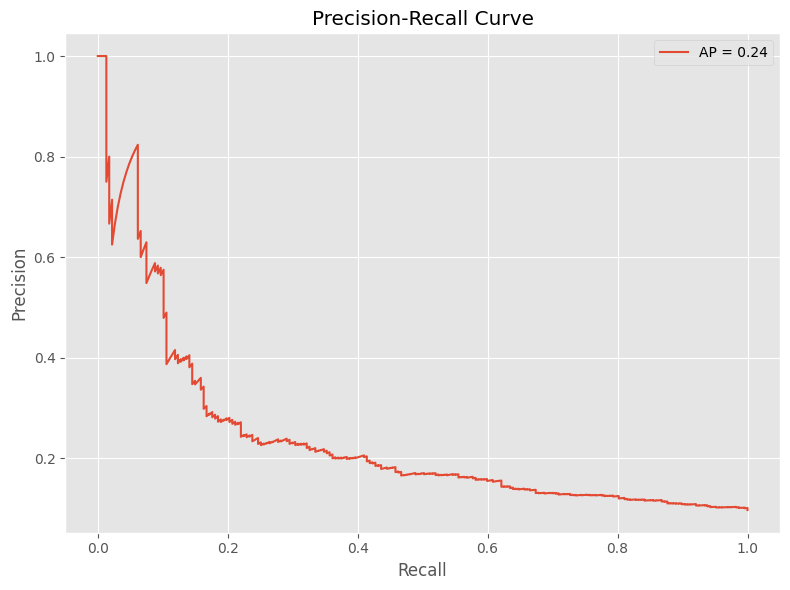

In [105]:
plot_precision_recall_curve(y_val, y_pred_proba)

## Logistic Regression

In [106]:
clf = LogisticRegression(random_state = random_seed)
clf.fit(x_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [109]:
x_train.isna().sum().sum()

np.int64(1304)

In [110]:
x_train.describe()

,cons_12m,forecast_cons_12m,forecast_meter_rent_12m,margin_gross_pow_ele,margin_net_pow_ele,net_margin,pow_max,days_since_modification,difference_price_mid_peak_var,difference_price_off_peak_fix,...,difference_price_peak_fix_0,difference_price_peak_fix_1,difference_price_mid_peak_fix_0,difference_price_mid_peak_fix_1,std_price_mid_peak_var_0,std_price_mid_peak_var_1,std_price_peak_fix_0,std_price_peak_fix_1,std_price_mid_peak_fix_0,std_price_mid_peak_fix_1
count,9347.000000,9347.000000,9347.000000,9347.000000,9347.000000,9347.000000,9347.000000,9347.000000,9347.000000,9347.000000,...,9347.000000,9347.000000,9347.000000,9347.000000,9347.000000,9347.000000,9347.000000,9347.000000,9347.000000,9347.000000
mean,0.001697,-0.002286,0.001085,0.002297,0.002246,-0.001850,0.002414,0.002456,-0.001057,-0.002131,...,0.007489,0.992511,0.007382,0.992618,0.617631,0.382369,0.663956,0.336044,0.663956,0.336044
std,0.999691,1.000218,1.002047,1.000556,1.000549,0.999734,0.998610,0.999611,0.999946,0.991154,...,0.086219,0.086219,0.085606,0.085606,0.485992,0.485992,0.472379,0.472379,0.472379,0.472379
min,-2.994530,-2.436374,-2.167292,-2.360414,-2.360516,-2.447934,-8.932349,-1.482630,-2.487115,-4.248024,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.721723,-0.694695,-0.598696,-0.611625,-0.614098,-0.709046,-0.559714,-1.032969,-0.360511,-1.236287,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.116991,-0.076187,-0.500955,0.008463,0.008709,-0.057434,-0.189693,0.072540,-0.360511,0.145684,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.754597,0.703871,1.128948,0.614247,0.614486,0.723927,0.814352,1.009088,0.599193,0.258062,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.575599,1.726485,2.038134,2.085529,2.085669,1.703229,1.733905,2.102305,1.583514,1.984906,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
